In [3]:
import sys
import os

os.chdir('code')
from cfn_model_generation import * 
os.chdir('..')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange


,Unnamed: 0,left_end_point,right_end_point,histogram_for_3-regular_tree,histogram_for_4-regular_tree
0,0,-1.000,-1.000,13,0
1,1,-0.996,-0.996,3,0
2,2,-0.992,-0.992,0,0
3,3,-0.988,-0.988,0,0
4,4,-0.984,-0.984,0,0


In [18]:
n_internal_verts = 200 #Number of internal vertices in the tree
batch_size = 10000 #Number of spins per batch.
num_batches = 50 #Number of batches per tree
tree_types = [2, 3, 4, 5,6,7,8] #Degree types for d-regular tree

trials_per_tree = batch_size * num_batches # Trials per tree
total_trials = trials_per_tree * len(tree_types) # Total number of trials


delta = 1/10  #Value of delta. Theoretical max is delta = 1/924
C_val = .5 #C_{2.1} and C_{2.2}
c_val = 0.25 #c_{2.1} and c_{2.2}

C_upperTail = 4/5 * (9 * C_val**2 / (2*c_val) + 2* C_val)**2 #C_{2.7}
c_lowerTail = 1 - 2*c_val/(3*C_val) #c_{2.8}

probability_upper_tail_constant = 7*C_val #c_{2.7}
probability_lower_tail_constant = 78*C_val**2 #C_{2.8}

upper_tail_sample_threshold = 1 - C_upperTail* delta**2
lower_tail_sample_threshold = -c_lowerTail

upper_tail_probability = 1 - probability_upper_tail_constant*delta
lower_tail_probability = probability_lower_tail_constant * delta**2

print(f"The theoretical upper-tail bound is {upper_tail_probability:.4} and lower-tail bound is {lower_tail_probability:.4} for delta = {delta}.")

num_bins = max(500,int(10/delta))
bins = np.linspace(-1,1, num_bins+1)




The theoretical upper-tail bound is 0.65 and lower-tail bound is 0.195 for delta = 0.1.


In [19]:
histograms = [np.histogram([], bins)[0] for _ in tree_types]
empircal_count_above_threshold = []
empircal_count_below_threshold = []

for ind, deg in enumerate(tree_types):
    print(f'Working on tree {ind+1}/{len(tree_types)}.')
    empircal_count_above_threshold.append(0)
    empircal_count_below_threshold.append(0)
    Z = histograms[ind]
    deg_sequence = [deg for _ in range(n_internal_verts)]
    root = GeneralizedFoataFuchs(deg_sequence, delta, C_val = C_val, c_val = c_val)
    for i in trange(num_batches):
        attempt = root.constructMagnetization(batch_size)
        root.magnetizations = None

        empircal_count_above_threshold[-1] += sum(attempt >= upper_tail_sample_threshold)
        empircal_count_below_threshold[-1] += sum(attempt <= lower_tail_sample_threshold)

        binned_attempt = np.histogram(attempt, bins)[0]

        Z = Z+binned_attempt
    histograms[ind] = Z
    p_up = empircal_count_above_threshold[-1]/trials_per_tree
    p_down = empircal_count_below_threshold[-1]/trials_per_tree
    print(f"Proportion of samples above upper threshold {p_up}.")
    print(f"Proportion of samples above upper threshold {p_down}.")


Working on tree 1/7.


100%|██████████| 50/50 [01:39<00:00,  1.99s/it]


Proportion of samples above upper threshold [0.930452].
Proportion of samples above upper threshold [0.003784].
Working on tree 2/7.


100%|██████████| 50/50 [02:25<00:00,  2.90s/it]


Proportion of samples above upper threshold [0.993374].
Proportion of samples above upper threshold [0.005366].
Working on tree 3/7.


100%|██████████| 50/50 [03:02<00:00,  3.66s/it]


Proportion of samples above upper threshold [0.991838].
Proportion of samples above upper threshold [0.000234].
Working on tree 4/7.


100%|██████████| 50/50 [03:43<00:00,  4.46s/it]


Proportion of samples above upper threshold [0.999362].
Proportion of samples above upper threshold [0.000624].
Working on tree 5/7.


100%|██████████| 50/50 [04:20<00:00,  5.20s/it]


Proportion of samples above upper threshold [0.999224].
Proportion of samples above upper threshold [1.6e-05].
Working on tree 6/7.


100%|██████████| 50/50 [05:02<00:00,  6.05s/it]


Proportion of samples above upper threshold [0.999936].
Proportion of samples above upper threshold [6.4e-05].
Working on tree 7/7.


100%|██████████| 50/50 [05:45<00:00,  6.90s/it]

Proportion of samples above upper threshold [0.999902].
Proportion of samples above upper threshold [8.e-06].


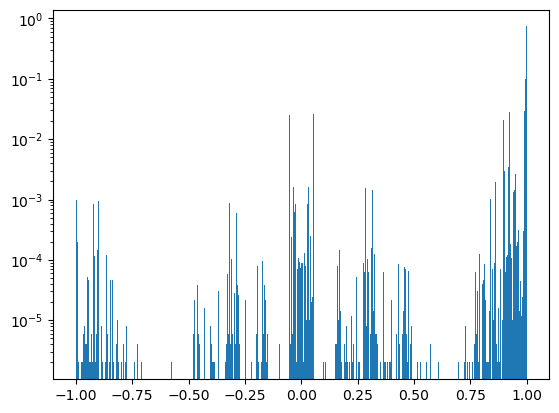

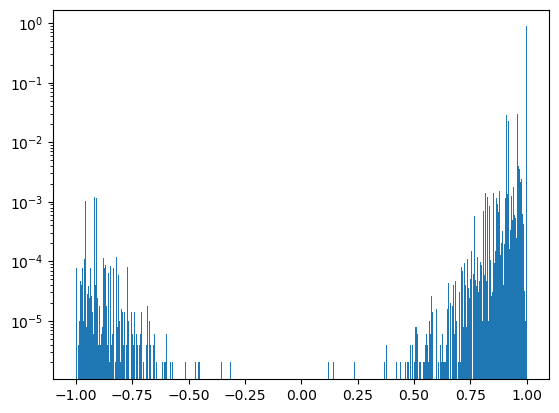

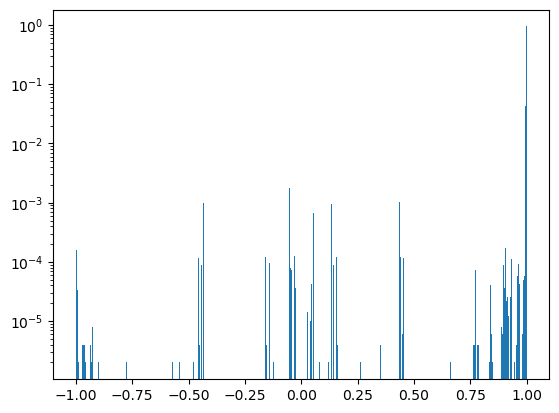

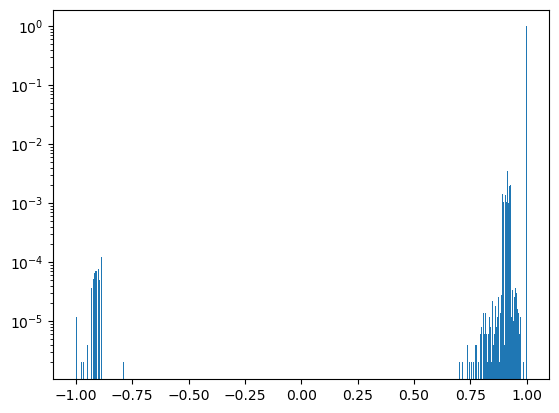

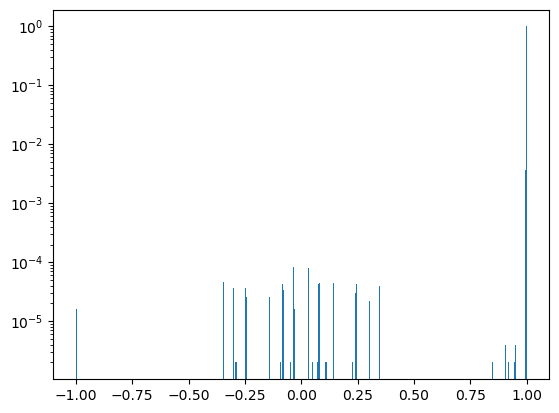

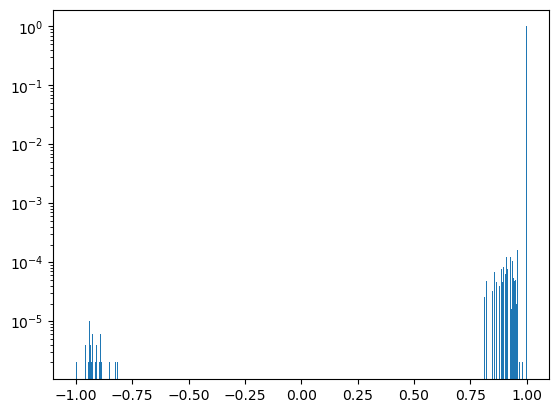

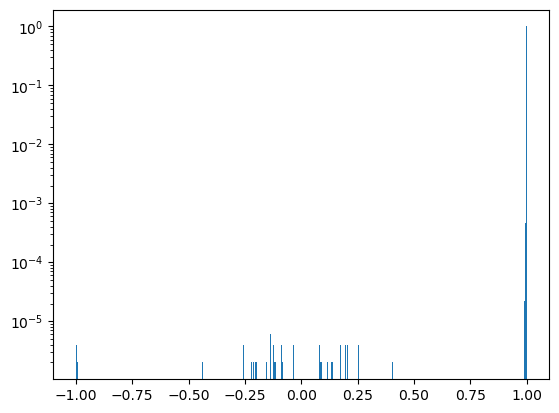

In [22]:
for Z in histograms:
    plt.stairs(Z/trials_per_tree,bins,fill=True)
    plt.yscale('log')
    plt.show()